# Plotting vectors

Add a cell to create a new vector, name the vector your firstname populate the vector with five values 2.3, 3.3 ,3.6,4.1,4.5Create a plot showing the vector arrow in green of the first two items in the vector. the first number is the x_ coordinate and the second is the y-coordinate.

In [27]:
import numpy as np
import matplotlib.pyplot as plt

[2.3 3.3]


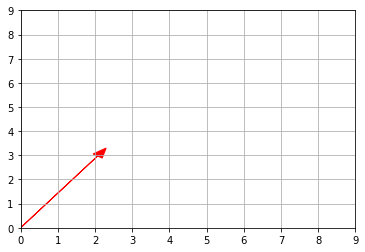

In [28]:

renzo = np.array([2.3, 3.3 , 3.6, 4.1, 4.5])

subArr = renzo[0:2]

print(subArr)
def plot_vector2d(vector2d, origin=[0, 0], **options):
  plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1], head_width=0.3, head_length=0.4, length_includes_head=True, **options)


plot_vector2d(subArr, color='r')
plt.axis([0, 9, 0, 9])
plt.grid()
plt.show()


# Norm

Add a cell to calculate the norm of the vector you added in the previous section using the linear algebra module, create a plot showing the radius of the vector.

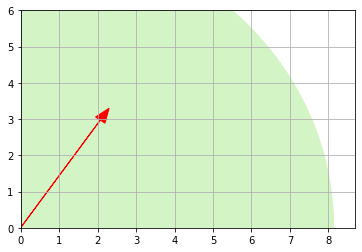

In [29]:
import numpy.linalg as LA

radius = LA.norm(renzo)
radius

plt.gca().add_artist(plt.Circle((0,0), radius, color="#D3F4C4"))
plot_vector2d(renzo, color="red")
plt.axis([0, 8.7, 0, 6])
plt.grid()
plt.show()

# Matrices

Add a cell to create a 3 by 3 matrix name it your first name. Fill the matrix with the following numbers 2,4,6,8,10,12,14,16,18. Print the following:

In [30]:
renzo = np.array(np.mat('2,4,6;8,10,12;14,16,18'))
renzo

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

1) diagonal of the matrix

In [31]:
print("Diagonal => ", np.diagonal(renzo))

Diagonal =>  [ 2 10 18]


2) the second row

In [32]:
print("Second row", renzo[1,:])

Second row [ 8 10 12]


4) the identity matrix

In [33]:
identity_matrix = np.eye(3);
print("Identity matrix 3x3 => ", identity_matrix)

Identity matrix 3x3 =>  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


5) multiply the matrix by a scalar of 2 and store the result in a new matrix named X

In [34]:
X = 2 * identity_matrix;
print("Identity matrix scaled by 2 => ", X)

Identity matrix scaled by 2 =>  [[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 2.]]


6) The result of multiplying X by the original matrix

In [35]:
renzo_original = np.dot(X, renzo);
renzo_original

array([[ 4.,  8., 12.],
       [16., 20., 24.],
       [28., 32., 36.]])

7) The transpose of X 

In [36]:
print("Transpose of X => ", X.T)

Transpose of X =>  [[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 2.]]


## Converting 1D arrays to 2D arrays in NumPy
As we mentionned earlier, in NumPy (as opposed to Matlab, for example), 1D really means 1D: there is no such thing as a vertical 1D-array or a horizontal 1D-array. So you should not be surprised to see that transposing a 1D array does not do anything:

In [37]:
y = np.array([2, 5])
y

array([2, 5])

In [38]:
y_transpose = y.T
y

array([2, 5])

We want to convert $\textbf{y}$ into a row vector before transposing it. There are a few ways to do this:

In [39]:
y_row = np.array([y])
y_row

array([[2, 5]])

Notice the extra square brackets: this is a 2D array with just one row (ie. a 1x2 matrix). In other words it really is a **row vector**.

In [40]:
y[np.newaxis, :]

array([[2, 5]])

This quite explicit: we are asking for a new vertical axis, keeping the existing data as the horizontal axis.

In [41]:
y[np.newaxis]

array([[2, 5]])

This is equivalent, but a little less explicit.

In [42]:
y[None]

array([[2, 5]])

This is the shortest version, but you probably want to avoid it because it is unclear. The reason it works is that `np.newaxis` is actually equal to `None`, so this is equivalent to the previous version.

Ok, now let's transpose our row vector:

In [43]:
y_row.T

array([[2],
       [5]])

Great! We now have a nice **column vector**.

Rather than creating a row vector then transposing it, it is also possible to convert a 1D array directly into a column vector:

In [44]:
y[:, np.newaxis]

array([[2],
       [5]])

## Plotting a matrix
We have already seen that vectors can been represented as points or arrows in N-dimensional space. Is there a good graphical representation of matrices? Well you can simply see a matrix as a list of vectors, so plotting a matrix results in many points or arrows. For example, let's create a $2 \times 4$ matrix `P` and plot it as points:

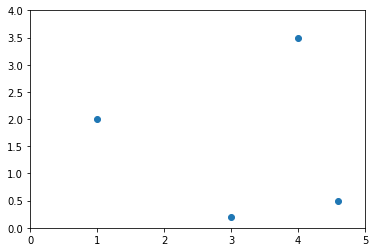

In [45]:
R = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]
    ])
x_coords_R, y_coords_R = R
plt.scatter(x_coords_R, y_coords_R)
plt.axis([0, 5, 0, 4])
plt.show()

Of course we could also have stored the same 4 vectors as row vectors instead of column vectors, resulting in a $4 \times 2$ matrix (the transpose of $R$, in fact). It is really an arbitrary choice.

Since the vectors are ordered, you can see the matrix as a path and represent it with connected dots:

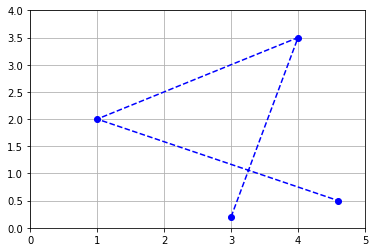

In [46]:
plt.plot(x_coords_R, y_coords_R, "bo")
plt.plot(x_coords_R, y_coords_R, "b--")
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

Or you can represent it as a polygon: matplotlib's `Polygon` class expects an $n \times 2$ NumPy array, not a $2 \times n$ array, so we just need to give it $P^T$:

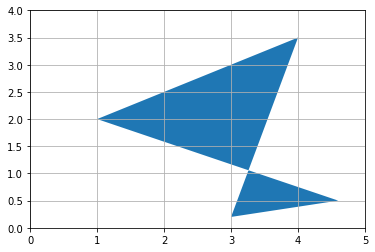

In [47]:
from matplotlib.patches import Polygon
plt.gca().add_artist(Polygon(R.T))
plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

## Geometric applications of matrix operations
We saw earlier that vector addition results in a geometric translation, vector multiplication by a scalar results in rescaling (zooming in or out, centered on the origin), and vector dot product results in projecting a vector onto another vector, rescaling and measuring the resulting coordinate.

Similarly, matrix operations have very useful geometric applications.

### Addition = multiple geometric translations
First, adding two matrices together is equivalent to adding all their vectors together. For example, let's create a $2 \times 4$ matrix $H$ and add it to $P$, and look at the result:

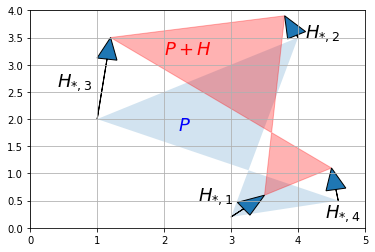

In [50]:
I = np.array([
        [ 0.5, -0.2, 0.2, -0.1],
        [ 0.4,  0.4, 1.5, 0.6]
    ])
R_moved = R + I

plt.gca().add_artist(Polygon(R.T, alpha=0.2))
plt.gca().add_artist(Polygon(R_moved.T, alpha=0.3, color="r"))
for vector, origin in zip(I.T, R.T):
    plot_vector2d(vector, origin=origin)

plt.text(2.2, 1.8, "$P$", color="b", fontsize=18)
plt.text(2.0, 3.2, "$P+H$", color="r", fontsize=18)
plt.text(2.5, 0.5, "$H_{*,1}$", color="k", fontsize=18)
plt.text(4.1, 3.5, "$H_{*,2}$", color="k", fontsize=18)
plt.text(0.4, 2.6, "$H_{*,3}$", color="k", fontsize=18)
plt.text(4.4, 0.2, "$H_{*,4}$", color="k", fontsize=18)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

If we add a matrix full of identical vectors, we get a simple geometric translation:

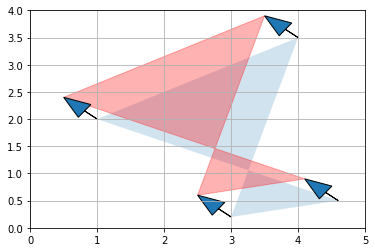

In [51]:
I2 = np.array([
        [-0.5, -0.5, -0.5, -0.5],
        [ 0.4,  0.4,  0.4,  0.4]
    ])
R_translated = R + I2

plt.gca().add_artist(Polygon(R.T, alpha=0.2))
plt.gca().add_artist(Polygon(R_translated.T, alpha=0.3, color="r"))
for vector, origin in zip(I2.T, R.T):
    plot_vector2d(vector, origin=origin)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

Although matrices can only be added together if they have the same size, NumPy allows adding a row vector or a column vector to a matrix: this is called *broadcasting* and is explained in further details in the [NumPy tutorial](tools_numpy.ipynb). We could have obtained the same result as above with:

In [75]:
R + [[-0.5], [0.4]]  # same as P + H2, thanks to NumPy broadcasting

array([[2.5, 3.5, 0.5, 4.1],
       [0.6, 3.9, 2.4, 0.9]])

### Scalar multiplication
Multiplying a matrix by a scalar results in all its vectors being multiplied by that scalar, so unsurprisingly, the geometric result is a rescaling of the entire figure. For example, let's rescale our polygon by a factor of 60% (zooming out, centered on the origin):

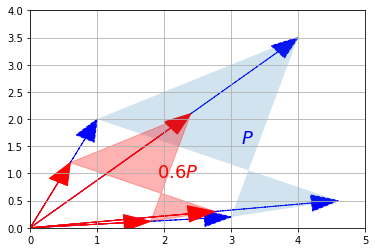

In [52]:
def plot_transformation(P_before, P_after, text_before, text_after, axis = [0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(P_before.T, P_after.T):
            plot_vector2d(vector_before, color="blue", linestyle="--")
            plot_vector2d(vector_after, color="red", linestyle="-")
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color="r"))
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color="blue")
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color="red")
    plt.axis(axis)
    plt.grid()

R_rescaled = 0.60 * R
plot_transformation(R, R_rescaled, "$P$", "$0.6 P$", arrows=True)
plt.show()

### Matrix multiplication – Projection onto an axis
Matrix multiplication is more complex to visualize, but it is also the most powerful tool in the box.

Let's start simple, by defining a $1 \times 2$ matrix $V = \begin{bmatrix} 1 & 0 \end{bmatrix}$. This row vector is just the horizontal unit vector.

In [55]:
V = np.array([[1, 0]])
V

array([[1, 0]])

Now let's look at the dot product $U \cdot P$:

In [58]:
print("R", R)
print("V", V)
V.dot(R)

R [[3.  4.  1.  4.6]
 [0.2 3.5 2.  0.5]]
V [[1 0]]


array([[3. , 4. , 1. , 4.6]])

These are the horizontal coordinates of the vectors in $P$. In other words, we just projected $P$ onto the horizontal axis:

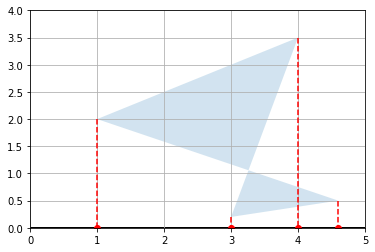

In [59]:
def plot_projection(U, P):
    U_P = U.dot(P)
    
    axis_end = 100 * U
    plot_vector2d(axis_end[0], color="black")

    plt.gca().add_artist(Polygon(P.T, alpha=0.2))
    for vector, proj_coordinate in zip(P.T, U_P.T):
        proj_point = proj_coordinate * U
        plt.plot(proj_point[0][0], proj_point[0][1], "ro")
        plt.plot([vector[0], proj_point[0][0]], [vector[1], proj_point[0][1]], "r--")

    plt.axis([0, 5, 0, 4])
    plt.grid()
    plt.show()

plot_projection(V, R)

We can actually project on any other axis by just replacing $U$ with any other unit vector. For example, let's project on the axis that is at a 30° angle above the horizontal axis:

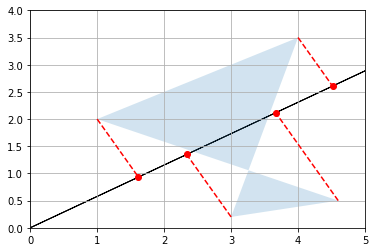

In [60]:
angle30 = 30 * np.pi / 180  # angle in radians
V_30 = np.array([[np.cos(angle30), np.sin(angle30)]])

plot_projection(V_30, R)

Good! Remember that the dot product of a unit vector and a matrix basically performs a projection on an axis and gives us the coordinates of the resulting points on that axis.

### Matrix multiplication – Rotation
Now let's create a $2 \times 2$ matrix $V$ containing two unit vectors that make 30° and 120° angles with the horizontal axis:

$X = \begin{bmatrix} \cos(30°) & \sin(30°) \\ \cos(120°) & \sin(120°) \end{bmatrix}$

In [61]:
angle120 = 120 * np.pi / 180
X = np.array([
        [np.cos(angle30), np.sin(angle30)],
        [np.cos(angle120), np.sin(angle120)]
    ])
X

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

Let's look at the product $VP$:

In [62]:
X.dot(R)

array([[ 2.69807621,  5.21410162,  1.8660254 ,  4.23371686],
       [-1.32679492,  1.03108891,  1.23205081, -1.8669873 ]])

The first row is equal to $X_{1,*} P$, which is the coordinates of the projection of $R$ onto the 30° axis, as we have seen above. The second row is $V_{2,*} R$, which is the coordinates of the projection of $R$ onto the 120° axis. So basically we obtained the coordinates of $R$ after rotating the horizontal and vertical axes by 30° (or equivalently after rotating the polygon by -30° around the origin)! Let's plot $XR$ to see this:

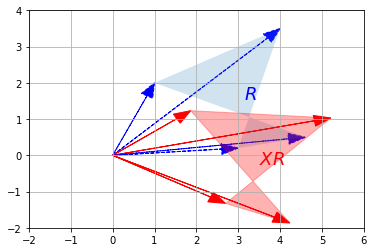

In [63]:
R_rotated = X.dot(R)
plot_transformation(R, R_rotated, "$R$", "$XR$", [-2, 6, -2, 4], arrows=True)
plt.show()

Matrix $X$ is called a **rotation matrix**.

### Matrix multiplication – Other linear transformations
More generally, any linear transformation $f$ that maps n-dimensional vectors to m-dimensional vectors can be represented as an $m \times n$ matrix. For example, say $\textbf{u}$ is a 3-dimensional vector:

$\textbf{u} = \begin{pmatrix} x \\ y \\ z \end{pmatrix}$

and $f$ is defined as:

$f(\textbf{u}) = \begin{pmatrix}
ax + by + cz \\
dx + ey + fz
\end{pmatrix}$

This transormation $f$ maps 3-dimensional vectors to 2-dimensional vectors in a linear way (ie. the resulting coordinates only involve sums of multiples of the original coordinates). We can represent this transformation as matrix $F$:

$F = \begin{bmatrix}
a & b & c \\
d & e & f
\end{bmatrix}$

Now, to compute $f(\textbf{u})$ we can simply do a matrix multiplication:

$f(\textbf{u}) = F \textbf{u}$

If we have a matric $G = \begin{bmatrix}\textbf{u}_1 & \textbf{u}_2 & \cdots & \textbf{u}_q \end{bmatrix}$, where each $\textbf{u}_i$ is a 3-dimensional column vector, then $FG$ results in the linear transformation of all vectors $\textbf{u}_i$ as defined by the matrix $F$:

$FG = \begin{bmatrix}f(\textbf{u}_1) & f(\textbf{u}_2) & \cdots & f(\textbf{u}_q) \end{bmatrix}$

To summarize, the matrix on the left hand side of a dot product specifies what linear transormation to apply to the right hand side vectors. We have already shown that this can be used to perform projections and rotations, but any other linear transformation is possible. For example, here is a transformation known as a *shear mapping*:

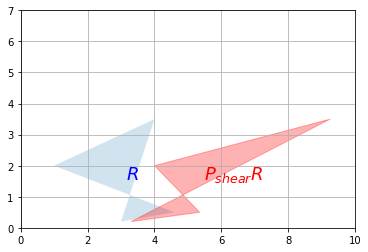

In [64]:
P_shear = np.array([
        [1, 1.5],
        [0, 1]
    ])
plot_transformation(R, P_shear.dot(R), "$R$", "$P_{shear} R$",
                    axis=[0, 10, 0, 7])
plt.show()

Let's look at how this transformation affects the **unit square**: 

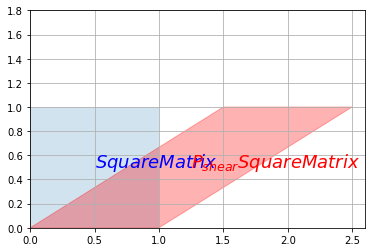

In [65]:
SquareMatrix = np.array([
        [0, 0, 1, 1],
        [0, 1, 1, 0]
    ])
plot_transformation(SquareMatrix, P_shear.dot(SquareMatrix), "$SquareMatrix$", "$P_{shear} SquareMatrix$",
                    axis=[0, 2.6, 0, 1.8])
plt.show()

Now let's look at a **squeeze mapping**:

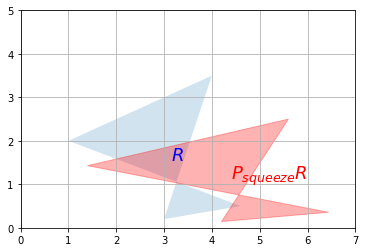

In [66]:
P_squeeze = np.array([
        [1.4, 0],
        [0, 1/1.4]
    ])
plot_transformation(R, P_squeeze.dot(R), "$R$", "$P_{squeeze} R$",
                    axis=[0, 7, 0, 5])
plt.show()

The effect on the unit square is:

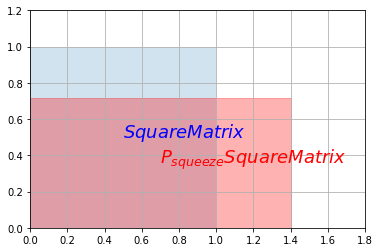

In [67]:
plot_transformation(SquareMatrix, P_squeeze.dot(SquareMatrix), "$SquareMatrix$", "$P_{squeeze} SquareMatrix$",
                    axis=[0, 1.8, 0, 1.2])
plt.show()

Let's show a last one: reflection through the horizontal axis:

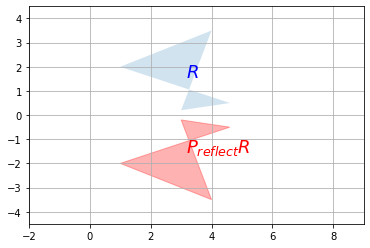

In [68]:
P_reflect = np.array([
        [1, 0],
        [0, -1]
    ])
plot_transformation(R, P_reflect.dot(R), "$R$", "$P_{reflect} R$",
                    axis=[-2, 9, -4.5, 4.5])
plt.show()

## Matrix inverse
Now that we understand that a matrix can represent any linear transformation, a natural question is: can we find a transformation matrix that reverses the effect of a given transformation matrix $F$? The answer is yes… sometimes! When it exists, such a matrix is called the **inverse** of $F$, and it is noted $F^{-1}$.

For example, the rotation, the shear mapping and the squeeze mapping above all have inverse transformations. Let's demonstrate this on the shear mapping:

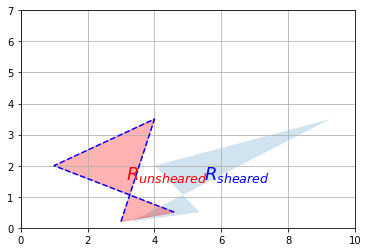

In [71]:
P_inv_shear = np.array([
    [1, -1.5],
    [0, 1]
])
R_sheared = P_shear.dot(R)
R_unsheared = P_inv_shear.dot(R_sheared)
plot_transformation(P_sheared, R_unsheared, "$R_{sheared}$", "$R_{unsheared}$",
                    axis=[0, 10, 0, 7])
plt.plot(R[0], R[1], "b--")
plt.show()

We applied a shear mapping on $P$, just like we did before, but then we applied a second transformation to the result, and *lo and behold* this had the effect of coming back to the original $P$ (we plotted the original $P$'s outline to double check). The second transformation is the inverse of the first one.

We defined the inverse matrix $F_{shear}^{-1}$ manually this time, but NumPy provides an `inv` function to compute a matrix's inverse, so we could have written instead:

In [72]:
R_inv_shear = LA.inv(P_shear)
R_inv_shear

array([[ 1. , -1.5],
       [ 0. ,  1. ]])

Only square matrices can be inversed. This makes sense when you think about it: if you have a transformation that reduces the number of dimensions, then some information is lost and there is no way that you can get it back. For example say you use a $2 \times 3$ matrix to project a 3D object onto a plane. The result may look like this:

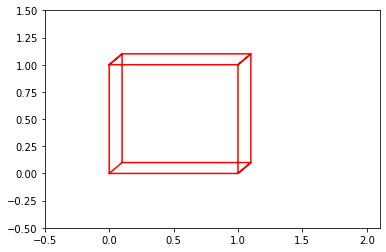

In [73]:
plt.plot([0, 0, 1, 1, 0, 0.1, 0.1, 0, 0.1, 1.1, 1.0, 1.1, 1.1, 1.0, 1.1, 0.1],
         [0, 1, 1, 0, 0, 0.1, 1.1, 1.0, 1.1, 1.1, 1.0, 1.1, 0.1, 0, 0.1, 0.1],
         "r-")
plt.axis([-0.5, 2.1, -0.5, 1.5])
plt.show()

Looking at this image, it is impossible to tell whether this is the projection of a cube or the projection of a narrow rectangular object. Some information has been lost in the projection.

Even square transformation matrices can lose information. For example, consider this transformation matrix:

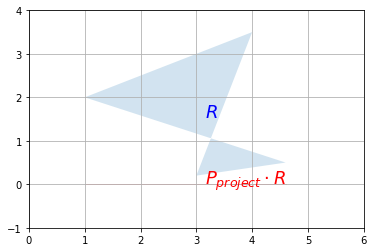

In [74]:
P_project = np.array([
        [1, 0],
        [0, 0]
    ])
plot_transformation(R, P_project.dot(R), "$R$", "$P_{project} \cdot R$",
                    axis=[0, 6, -1, 4])
plt.show()

This transformation matrix performs a projection onto the horizontal axis. Our polygon gets entirely flattened out so some information is entirely lost and it is impossible to go back to the original polygon using a linear transformation. In other words, $F_{project}$ has no inverse. Such a square matrix that cannot be inversed is called a **singular matrix** (aka degenerate matrix). If we ask NumPy to calculate its inverse, it raises an exception:

In [76]:
try:
    LA.inv(P_project)
except LA.LinAlgError as e:
    print("LinAlgError:", e)

LinAlgError: Singular matrix


Here is another example of a singular matrix. This one performs a projection onto the axis at a 30° angle above the horizontal axis:

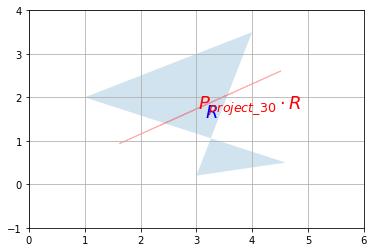

In [77]:
angle30 = 30 * np.pi / 180
P_project_30 = np.array([
               [np.cos(angle30)**2, np.sin(2*angle30)/2],
               [np.sin(2*angle30)/2, np.sin(angle30)**2]
         ])
plot_transformation(R, P_project_30.dot(R), "$R$", "$P_{project\_30} \cdot R$",
                    axis=[0, 6, -1, 4])
plt.show()

But this time, due to floating point rounding errors, NumPy manages to calculate an inverse (notice how large the elements are, though):

In [ ]:
LA.inv(P_project_30)

As you might expect, the dot product of a matrix by its inverse results in the identity matrix:

$M \cdot M^{-1} = M^{-1} \cdot M = I$

This makes sense since doing a linear transformation followed by the inverse transformation results in no change at all.

In [78]:
P_shear.dot(LA.inv(P_shear))

array([[1., 0.],
       [0., 1.]])

Another way to express this is that the inverse of the inverse of a matrix $M$ is $M$ itself:

$((M)^{-1})^{-1} = M$

In [79]:
LA.inv(LA.inv(P_shear))

array([[1. , 1.5],
       [0. , 1. ]])

Also, the inverse of scaling by a factor of $\lambda$ is of course scaling by a factor or $\frac{1}{\lambda}$:

$ (\lambda \times M)^{-1} = \frac{1}{\lambda} \times M^{-1}$

Once you understand the geometric interpretation of matrices as linear transformations, most of these properties seem fairly intuitive.

A matrix that is its own inverse is called an **involution**. The simplest examples are reflection matrices, or a rotation by 180°, but there are also more complex involutions, for example imagine a transformation that squeezes horizontally, then  reflects over the vertical axis and finally rotates by 90° clockwise. Pick up a napkin and try doing that twice: you will end up in the original position. Here is the corresponding involutory matrix:

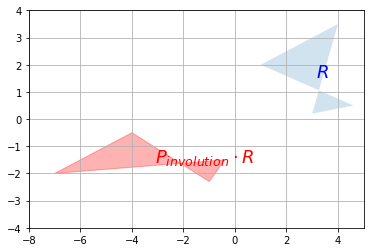

In [80]:
P_involution  = np.array([
        [0, -2],
        [-1/2, 0]
    ])
plot_transformation(R, P_involution.dot(R), "$R$", "$P_{involution} \cdot R$",
                    axis=[-8, 5, -4, 4])
plt.show()

Finally, a square matrix $H$ whose inverse is its own transpose is an **orthogonal matrix**:

$H^{-1} = H^T$

Therefore:

$H \cdot H^T = H^T \cdot H = I$

It corresponds to a transformation that preserves distances, such as rotations and reflections, and combinations of these, but not rescaling, shearing or squeezing.  Let's check that $F_{reflect}$ is indeed orthogonal:

In [81]:
P_reflect.dot(P_reflect.T)

array([[1, 0],
       [0, 1]])

## Determinant
The determinant of a square matrix $M$, noted $\det(M)$ or $\det M$ or $|M|$ is a value that can be calculated from its elements $(M_{i,j})$ using various equivalent methods. One of the simplest methods is this recursive approach:

$|M| = M_{1,1}\times|M^{(1,1)}| - M_{2,1}\times|M^{(2,1)}| + M_{3,1}\times|M^{(3,1)}| - M_{4,1}\times|M^{(4,1)}| + \cdots ± M_{n,1}\times|M^{(n,1)}|$

* Where $M^{(i,j)}$ is the matrix $M$ without row $i$ and column $j$.

For example, let's calculate the determinant of the following $3 \times 3$ matrix:

$M = \begin{bmatrix}
  1 & 2 & 3 \\
  4 & 5 & 6 \\
  7 & 8 & 0
\end{bmatrix}$

Using the method above, we get:

$|M| = 1 \times \left | \begin{bmatrix} 5 & 6 \\ 8 & 0 \end{bmatrix} \right |
     - 2 \times \left | \begin{bmatrix} 4 & 6 \\ 7 & 0 \end{bmatrix} \right |
     + 3 \times \left | \begin{bmatrix} 4 & 5 \\ 7 & 8 \end{bmatrix} \right |$

Now we need to compute the determinant of each of these $2 \times 2$ matrices (these determinants are called **minors**):

$\left | \begin{bmatrix} 5 & 6 \\ 8 & 0 \end{bmatrix} \right | = 5 \times 0 - 6 \times 8 = -48$

$\left | \begin{bmatrix} 4 & 6 \\ 7 & 0 \end{bmatrix} \right | = 4 \times 0 - 6 \times 7 = -42$

$\left | \begin{bmatrix} 4 & 5 \\ 7 & 8 \end{bmatrix} \right | = 4 \times 8 - 5 \times 7 = -3$

Now we can calculate the final result:

$|M| = 1 \times (-48) - 2 \times (-42) + 3 \times (-3) = 27$

To get the determinant of a matrix, you can call NumPy's `det` function in the `numpy.linalg` module:

In [ ]:
N = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 0]
    ])
LA.det(N)

One of the main uses of the determinant is to *determine* whether a square matrix can be inversed or not: if the determinant is equal to 0, then the matrix *cannot* be inversed (it is a singular matrix), and if the determinant is not 0, then it *can* be inversed.

For example, let's compute the determinant for the $F_{project}$, $P_{project\_30}$ and $P_{shear}$ matrices that we defined earlier:

In [82]:
LA.det(P_project)

0.0

That's right, $P_{project}$ is singular, as we saw earlier.

In [ ]:
LA.det(P_project_30)

This determinant is suspiciously close to 0: it really should be 0, but it's not due to tiny floating point errors. The matrix is actually singular.

In [83]:
LA.det(P_shear)

1.0

Perfect! This matrix *can* be inversed as we saw earlier. Wow, math really works!

The determinant can also be used to measure how much a linear transformation affects surface areas: for example, the projection matrices $P_{project}$ and $P_{project\_30}$ completely flatten the polygon $R$, until its area is zero. This is why the determinant of these matrices is 0. The shear mapping modified the shape of the polygon, but it did not affect its surface area, which is why the determinant is 1. You can try computing the determinant of a rotation matrix, and you should also find 1. What about a scaling matrix? Let's see:

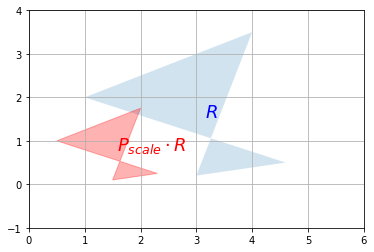

In [84]:
P_scale = np.array([
        [0.5, 0],
        [0, 0.5]
    ])
plot_transformation(R, P_scale.dot(R), "$R$", "$P_{scale} \cdot R$",
                    axis=[0, 6, -1, 4])
plt.show()

We rescaled the polygon by a factor of 1/2 on both vertical and horizontal axes so the surface area of the resulting polygon is 1/4$^{th}$ of the original polygon. Let's compute the determinant and check that:

In [85]:
LA.det(P_scale)

0.25

Correct!

The determinant can actually be negative, when the transformation results in a "flipped over" version of the original polygon (eg. a left hand glove becomes a right hand glove). For example, the determinant of the `F_reflect` matrix is -1 because the surface area is preserved but the polygon gets flipped over:

In [86]:
LA.det(P_reflect)

-1.0

## Composing linear transformations
Several linear transformations can be chained simply by performing multiple dot products in a row. For example, to perform a squeeze mapping followed by a shear mapping, just write:

In [87]:
R_squeezed_then_sheared = P_shear.dot(P_squeeze.dot(R))

Since the dot product is associative, the following code is equivalent:

In [88]:
R_squeezed_then_sheared = (P_shear.dot(P_squeeze)).dot(R)

Note that the order of the transformations is the reverse of the dot product order.

If we are going to perform this composition of linear transformations more than once, we might as well save the composition matrix like this:

In [91]:
P_squeeze_then_shear = P_shear.dot(P_squeeze)
R_squeezed_then_sheared = P_squeeze_then_shear.dot(R)

From now on we can perform both transformations in just one dot product, which can lead to a very significant performance boost.

What if you want to perform the inverse of this double transformation? Well, if you squeezed and then you sheared, and you want to undo what you have done, it should be obvious that you should unshear first and then unsqueeze. In more mathematical terms, given two invertible (aka nonsingular) matrices $Q$ and $R$:

$(Q \cdot R)^{-1} = R^{-1} \cdot Q^{-1}$

And in NumPy:

In [92]:
LA.inv(P_shear.dot(P_squeeze)) == LA.inv(P_squeeze).dot(LA.inv(P_shear))

array([[ True,  True],
       [ True,  True]])

## Singular Value Decomposition
It turns out that any $m \times n$ matrix $M$ can be decomposed into the dot product of three simple matrices:
* a rotation matrix $V$ (an $m \times m$ orthogonal matrix)
* a scaling & projecting matrix $\Sigma$ (an $m \times n$ diagonal matrix)
* and another rotation matrix $U^T$ (an $n \times n$ orthogonal matrix)

$M = V \cdot \Sigma \cdot U^{T}$

For example, let's decompose the shear transformation:

In [93]:
V, A_diag, U_T = LA.svd(P_shear) # note: in python 3 you can rename S_diag to Σ_diag
V

array([[ 0.89442719, -0.4472136 ],
       [ 0.4472136 ,  0.89442719]])

In [94]:
A_diag

array([2. , 0.5])

Note that this is just a 1D array containing the diagonal values of Σ. To get the actual matrix Σ, we can use NumPy's `diag` function:

In [95]:
A = np.diag(A_diag)
A

array([[2. , 0. ],
       [0. , 0.5]])

Now let's check that $V \cdot \Sigma \cdot U^T$ is indeed equal to `F_shear`:

In [97]:
V.dot(np.diag(A_diag)).dot(U_T)

array([[ 1.00000000e+00,  1.50000000e+00],
       [-1.25949234e-17,  1.00000000e+00]])

In [98]:
P_shear

array([[1. , 1.5],
       [0. , 1. ]])

It worked like a charm. Let's apply these transformations one by one (in reverse order) on the unit square to understand what's going on. First, let's apply the first rotation $U^T$:

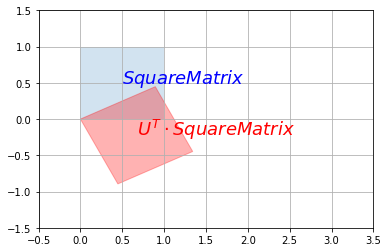

In [99]:
plot_transformation(SquareMatrix, U_T.dot(SquareMatrix), "$SquareMatrix$", "$U^T \cdot SquareMatrix$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

Now let's rescale along the vertical and horizontal axes using $\Sigma$:

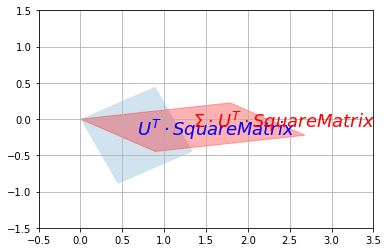

In [101]:
plot_transformation(U_T.dot(SquareMatrix), A.dot(U_T).dot(SquareMatrix), "$U^T \cdot SquareMatrix$", "$\Sigma \cdot U^T \cdot SquareMatrix$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

Finally, we apply the second rotation $U$:

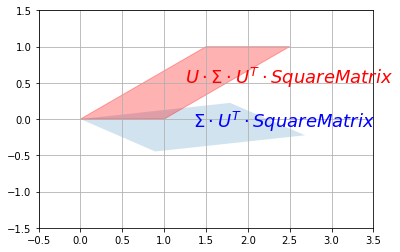

In [103]:
plot_transformation(A.dot(U_T).dot(SquareMatrix), V.dot(A).dot(U_T).dot(SquareMatrix),"$\Sigma \cdot U^T \cdot SquareMatrix$", "$U \cdot \Sigma \cdot U^T \cdot SquareMatrix$",
                    axis=[-0.5, 3.5 , -1.5, 1.5])
plt.show()

And we can see that the result is indeed a shear mapping of the original unit square.

## Eigenvectors and eigenvalues
An **eigenvector** of a square matrix $M$ (also called a **characteristic vector**) is a non-zero vector that remains on the same line after transformation by the linear transformation associated with $M$. A more formal definition is any vector $v$ such that:

$M \cdot v = \lambda \times v$

Where $\lambda$ is a scalar value called the **eigenvalue** associated to the vector $v$.

For example, any horizontal vector remains horizontal after applying the shear mapping (as you can see on the image above), so it is an eigenvector of $M$. A vertical vector ends up tilted to the right, so vertical vectors are *NOT* eigenvectors of $M$.

If we look at the squeeze mapping, we find that any horizontal or vertical vector keeps its direction (although its length changes), so all horizontal and vertical vectors are eigenvectors of $F_{squeeze}$.

However, rotation matrices have no eigenvectors at all (except if the rotation angle is 0° or 180°, in which case all non-zero vectors are eigenvectors).

NumPy's `eig` function returns the list of unit eigenvectors and their corresponding eigenvalues for any square matrix. Let's look at the eigenvectors and eigenvalues of the squeeze mapping matrix $F_{squeeze}$:

In [104]:
eigenvalues_R, eigenvectors_R = LA.eig(P_squeeze)
eigenvalues_R # [λ0, λ1, …]

array([1.4       , 0.71428571])

In [105]:
eigenvectors_R # [v0, v1, …]

array([[1., 0.],
       [0., 1.]])

Indeed the horizontal vectors are stretched by a factor of 1.4, and the vertical vectors are shrunk by a factor of 1/1.4=0.714…, so far so good. Let's look at the shear mapping matrix $F_{shear}$:

In [106]:
eigenvalues2_R, eigenvectors2_R = LA.eig(P_shear)
eigenvalues2_R # [λ0, λ1, …]

array([1., 1.])

In [107]:
eigenvectors2_R # [v0, v1, …]

array([[ 1.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  1.48029737e-16]])

Wait, what!? We expected just one unit eigenvector, not two. The second vector is almost equal to $\begin{pmatrix}-1 \\ 0 \end{pmatrix}$, which is on the same line as the first vector $\begin{pmatrix}1 \\ 0 \end{pmatrix}$. This is due to floating point errors. We can safely ignore vectors that are (almost) colinear (ie. on the same line).

## Trace
The trace of a square matrix $M$, noted $tr(M)$ is the sum of the values on its main diagonal. For example:

In [108]:
P = np.array([
        [100, 200, 300],
        [ 10,  20,  30],
        [  1,   2,   3],
    ])
np.trace(P)

123

The trace does not have a simple geometric interpretation (in general), but it has a number of properties that make it useful in many areas:
* $tr(A + B) = tr(A) + tr(B)$
* $tr(A \cdot B) = tr(B \cdot A)$
* $tr(A \cdot B \cdot \cdots \cdot Y \cdot Z) = tr(Z \cdot A \cdot B \cdot \cdots \cdot Y)$
* $tr(A^T \cdot B) = tr(A \cdot B^T) = tr(B^T \cdot A) = tr(B \cdot A^T) = \sum_{i,j}X_{i,j} \times Y_{i,j}$
* …

It does, however, have a useful geometric interpretation in the case of projection matrices (such as $F_{project}$ that we discussed earlier): it corresponds to the number of dimensions after projection. For example:

In [109]:
np.trace(P_project)

1

# What next?
This concludes this introduction to Linear Algebra. Although these basics cover most of what you will need to know for Machine Learning, if you wish to go deeper into this topic there are many options available: Linear Algebra [books](http://linear.axler.net/), [Khan Academy](https://www.khanacademy.org/math/linear-algebra) lessons, or just [Wikipedia](https://en.wikipedia.org/wiki/Linear_algebra) pages. 